In [1]:
from torchvision.datasets import VOCDetection
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import cv2
import numpy as np

In [2]:
voc_trainset = VOCDetection("./data/train",year="2007",image_set='trainval',download=False)
print(len(voc_trainset))

5011


In [3]:
voc_testset = VOCDetection("./data/test",year="2007",image_set='test',download=False)
print(len(voc_testset))

4952


In [4]:
# print(voc_trainset[0])
print(voc_trainset.images)
images = voc_trainset.images
images[0]

['./data/train\\VOCdevkit\\VOC2007\\JPEGImages\\000005.jpg', './data/train\\VOCdevkit\\VOC2007\\JPEGImages\\000007.jpg', './data/train\\VOCdevkit\\VOC2007\\JPEGImages\\000009.jpg', './data/train\\VOCdevkit\\VOC2007\\JPEGImages\\000012.jpg', './data/train\\VOCdevkit\\VOC2007\\JPEGImages\\000016.jpg', './data/train\\VOCdevkit\\VOC2007\\JPEGImages\\000017.jpg', './data/train\\VOCdevkit\\VOC2007\\JPEGImages\\000019.jpg', './data/train\\VOCdevkit\\VOC2007\\JPEGImages\\000020.jpg', './data/train\\VOCdevkit\\VOC2007\\JPEGImages\\000021.jpg', './data/train\\VOCdevkit\\VOC2007\\JPEGImages\\000023.jpg', './data/train\\VOCdevkit\\VOC2007\\JPEGImages\\000024.jpg', './data/train\\VOCdevkit\\VOC2007\\JPEGImages\\000026.jpg', './data/train\\VOCdevkit\\VOC2007\\JPEGImages\\000030.jpg', './data/train\\VOCdevkit\\VOC2007\\JPEGImages\\000032.jpg', './data/train\\VOCdevkit\\VOC2007\\JPEGImages\\000033.jpg', './data/train\\VOCdevkit\\VOC2007\\JPEGImages\\000034.jpg', './data/train\\VOCdevkit\\VOC2007\\JPEG

'./data/train\\VOCdevkit\\VOC2007\\JPEGImages\\000005.jpg'

In [16]:
img ,target = voc_trainset[887]

['./data/train\\VOCdevkit\\VOC2007\\Annotations\\000005.xml',
 './data/train\\VOCdevkit\\VOC2007\\Annotations\\000007.xml',
 './data/train\\VOCdevkit\\VOC2007\\Annotations\\000009.xml',
 './data/train\\VOCdevkit\\VOC2007\\Annotations\\000012.xml',
 './data/train\\VOCdevkit\\VOC2007\\Annotations\\000016.xml',
 './data/train\\VOCdevkit\\VOC2007\\Annotations\\000017.xml',
 './data/train\\VOCdevkit\\VOC2007\\Annotations\\000019.xml',
 './data/train\\VOCdevkit\\VOC2007\\Annotations\\000020.xml',
 './data/train\\VOCdevkit\\VOC2007\\Annotations\\000021.xml',
 './data/train\\VOCdevkit\\VOC2007\\Annotations\\000023.xml',
 './data/train\\VOCdevkit\\VOC2007\\Annotations\\000024.xml',
 './data/train\\VOCdevkit\\VOC2007\\Annotations\\000026.xml',
 './data/train\\VOCdevkit\\VOC2007\\Annotations\\000030.xml',
 './data/train\\VOCdevkit\\VOC2007\\Annotations\\000032.xml',
 './data/train\\VOCdevkit\\VOC2007\\Annotations\\000033.xml',
 './data/train\\VOCdevkit\\VOC2007\\Annotations\\000034.xml',
 './data

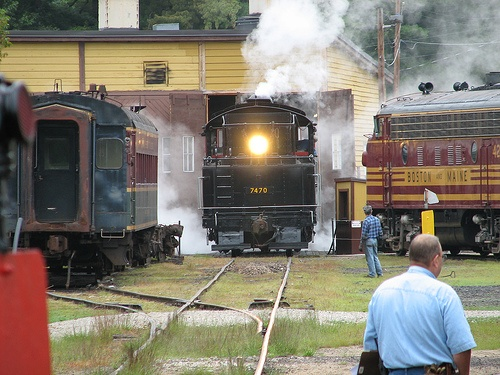

In [6]:
img

In [7]:
img.size,img.mode

((500, 375), 'RGB')

In [15]:
target["annotation"]['object'],len(target["annotation"]['object'])

([{'name': 'train',
   'pose': 'Rear',
   'truncated': '0',
   'difficult': '0',
   'bndbox': {'xmin': '1', 'ymin': '84', 'xmax': '159', 'ymax': '288'}},
  {'name': 'train',
   'pose': 'Unspecified',
   'truncated': '0',
   'difficult': '0',
   'bndbox': {'xmin': '197', 'ymin': '98', 'xmax': '323', 'ymax': '256'}},
  {'name': 'train',
   'pose': 'Unspecified',
   'truncated': '1',
   'difficult': '0',
   'bndbox': {'xmin': '363', 'ymin': '73', 'xmax': '500', 'ymax': '260'}},
  {'name': 'person',
   'pose': 'Unspecified',
   'truncated': '0',
   'difficult': '0',
   'bndbox': {'xmin': '359', 'ymin': '206', 'xmax': '386', 'ymax': '278'}},
  {'name': 'person',
   'pose': 'Unspecified',
   'truncated': '1',
   'difficult': '0',
   'bndbox': {'xmin': '357', 'ymin': '234', 'xmax': '477', 'ymax': '375'}}],
 5)

In [9]:
target

{'annotation': {'folder': 'VOC2007',
  'filename': '001789.jpg',
  'source': {'database': 'The VOC2007 Database',
   'annotation': 'PASCAL VOC2007',
   'image': 'flickr',
   'flickrid': '262596822'},
  'owner': {'flickrid': 'rbglasson', 'name': 'Russ Glasson'},
  'size': {'width': '500', 'height': '375', 'depth': '3'},
  'segmented': '0',
  'object': [{'name': 'train',
    'pose': 'Rear',
    'truncated': '0',
    'difficult': '0',
    'bndbox': {'xmin': '1', 'ymin': '84', 'xmax': '159', 'ymax': '288'}},
   {'name': 'train',
    'pose': 'Unspecified',
    'truncated': '0',
    'difficult': '0',
    'bndbox': {'xmin': '197', 'ymin': '98', 'xmax': '323', 'ymax': '256'}},
   {'name': 'train',
    'pose': 'Unspecified',
    'truncated': '1',
    'difficult': '0',
    'bndbox': {'xmin': '363', 'ymin': '73', 'xmax': '500', 'ymax': '260'}},
   {'name': 'person',
    'pose': 'Unspecified',
    'truncated': '0',
    'difficult': '0',
    'bndbox': {'xmin': '359', 'ymin': '206', 'xmax': '386', '

In [10]:

def show_rect(image: np.ndarray, bndbox):
    pt1 = bndbox[:2]
    pt2 = bndbox[2:]
    image_show = image
    return cv2.rectangle(image_show, pt1, pt2, (0, 255, 255), 2)


In [11]:
def show_name(image,name,p_tl):
    return cv2.putText(image,name,p_tl,1,1,(255,255,0))
    

In [12]:
for i,samele in enumerate(voc_trainset,1):
    image,annotation = samele[0],samele[1]["annotation"]
    objects = annotation['object']
    show_image = np.array(image)
    print("{} object:{}".format(i,len(objects)))
    if len(objects)==1:
        objects = objects[0]
        object_name = objects['name']
        object_bndbox = objects['bndbox']
        x_min = int(object_bndbox['xmin'])
        y_min = int(object_bndbox['ymin'])
        x_max = int(object_bndbox['xmax'])
        y_max = int(object_bndbox['ymax'])
        show_image = show_rect(show_image,(x_min,y_min,x_max,y_max))
        show_image = show_name(show_image,object_name,(x_min,y_min))
    else:
        for j in objects:
            object_name = j['name']
            object_bndbox = j['bndbox']
            x_min = int(object_bndbox['xmin'])
            y_min = int(object_bndbox['ymin'])
            x_max = int(object_bndbox['xmax'])
            y_max = int(object_bndbox['ymax'])
            show_image = show_rect(show_image, (x_min, y_min, x_max, y_max))
            show_image = show_name(show_image, object_name, (x_min, y_min))
    cv2.imshow('image',show_image)
    cv2.waitKey(0)
    break

1 object:5
